## I. Load dữ liệu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_path = '/content/drive/My Drive/CBD Robotics course/Assignment 08/fruits/fruits-360/Training'
test_path = '/content/drive/My Drive/CBD Robotics course/Assignment 08/fruits/fruits-360/Test'

### 1.1 tìm hiểu về thông tin dữ liệu

In [3]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
# load and iterate training dataset
train_it = datagen.flow_from_directory(directory=train_path, target_size=(100, 100), color_mode="rgb",  class_mode='categorical', batch_size=64)

Using TensorFlow backend.


Found 56781 images belonging to 111 classes.


In [4]:
train_it.samples

56781

In [5]:
train_it.num_classes

111

In [6]:
train_it.image_shape

(100, 100, 3)

In [7]:
train_it.data_format

'channels_last'

- Tập train có 56781 hình và 111 nhãn
- Có format là [width] [height] [channel] , shape của mỗi hình (100, 100, 3)


### 1.2 Tạo dữ liệu bảng để phân tích

In [8]:
import os
path = train_path
label_list= os.listdir(os.path.expanduser(path)) # lấy list các nhãn
new_dic = {}
for label in label_list:
  num= os.listdir(os.path.expanduser(os.path.join(path, label))) # nối path và lấy list các item trong đó
  new_dic[label] = len(num) # thêm vào dictionary
new_dic

{'Apple Braeburn': 492,
 'Apple Crimson Snow': 444,
 'Apple Golden 1': 492,
 'Apple Golden 2': 492,
 'Apple Golden 3': 481,
 'Apple Granny Smith': 492,
 'Apple Pink Lady': 456,
 'Apple Red 1': 492,
 'Apple Red 2': 492,
 'Apple Red 3': 429,
 'Apple Red Delicious': 490,
 'Apple Red Yellow 1': 492,
 'Apple Red Yellow 2': 672,
 'Apricot': 492,
 'Avocado': 427,
 'Avocado ripe': 491,
 'Banana': 490,
 'Banana Lady Finger': 450,
 'Banana Red': 490,
 'Blueberry': 462,
 'Cactus fruit': 490,
 'Cantaloupe 1': 492,
 'Cantaloupe 2': 492,
 'Carambula': 490,
 'Cherry 1': 492,
 'Cherry 2': 738,
 'Cherry Rainier': 738,
 'Cherry Wax Black': 492,
 'Cherry Wax Red': 492,
 'Cherry Wax Yellow': 492,
 'Chestnut': 450,
 'Clementine': 490,
 'Cocos': 490,
 'Dates': 490,
 'Granadilla': 490,
 'Grape Blue': 984,
 'Grape Pink': 492,
 'Grape White': 490,
 'Grape White 2': 490,
 'Grape White 3': 492,
 'Grape White 4': 471,
 'Grapefruit Pink': 490,
 'Grapefruit White': 492,
 'Guava': 490,
 'Hazelnut': 464,
 'Huckleberr

In [0]:
# Tạo DataFrame từ dictionary
import pandas as pd
data = pd.DataFrame({'fruit_name': list(new_dic.keys()),
                    'number': list(new_dic.values())})

Với Fruit name là tên các loại hoa quả, Number là số item hình của các hoa quả đó.

In [10]:
data.head()

,fruit_name,number
0,Tomato 4,479
1,Tomato Yellow,459
2,Tomato Maroon,367
3,Tomato 3,738
4,Tomato 2,672


In [11]:
data.describe()

,number
count,111.000000
mean,511.540541
std,101.801392
min,300.000000
25%,480.500000
50%,490.000000
75%,492.000000
max,984.000000


In [36]:
data[data['number']>492].sort_values(by='number',ascending=False)

,fruit_name,number
79,Grape Blue,984
21,Plum 3,900
3,Tomato 3,738
5,Tomato 1,738
8,Strawberry Wedge,738
43,Peach 2,738
50,Melon Piel de Sapo,738
88,Cherry 2,738
89,Cherry Rainier,738
7,Walnut,735


In [13]:
print(len(data[data['number']>492]))

16


## II. Visualization

### 2.1 Minh họa theo biểu đồ cột.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

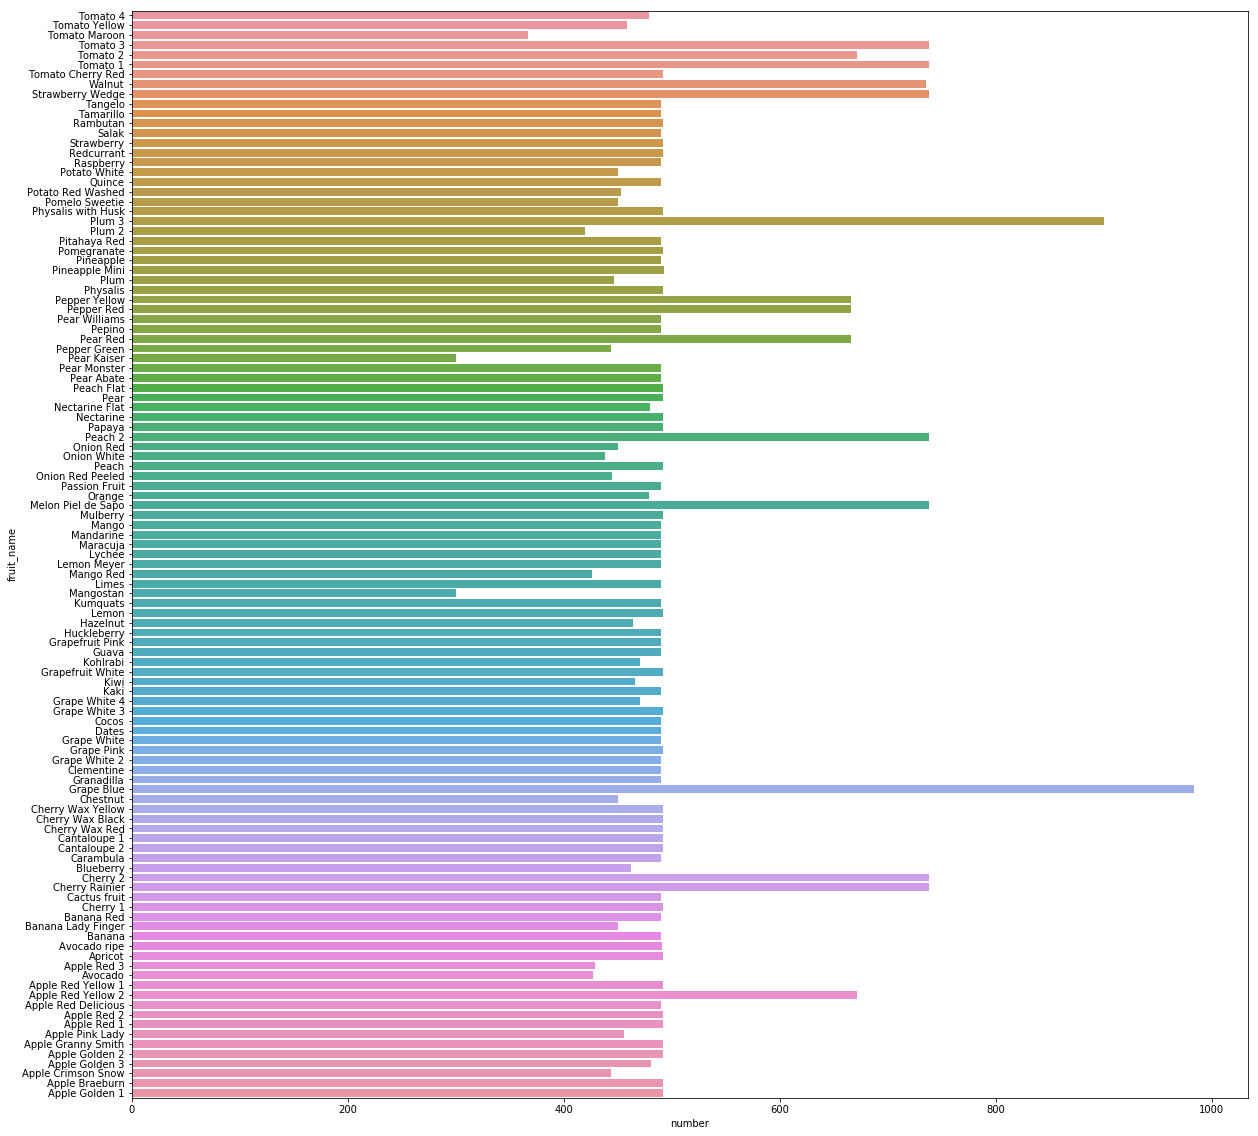

In [15]:
f, ax = plt.subplots(figsize=(20,20))
sns.barplot(x='number', y='fruit_name', data=data)

- Số lượng trái cây trong dữ liệu (train) không đồng đều. Nhãn thấp nhất có **300** hình và nhiều nhất có **984** hình.
- Cụ thể có 16 loại trái cây có số hình lớn hơn số trái cây còn lại (trong 111 trái). Và trái Grape Blue (984) và Plum 3 (900) có số hình lớn nhất.

### 2.2 Minh họa hình trái cây (màu) của từng loại trái cây.

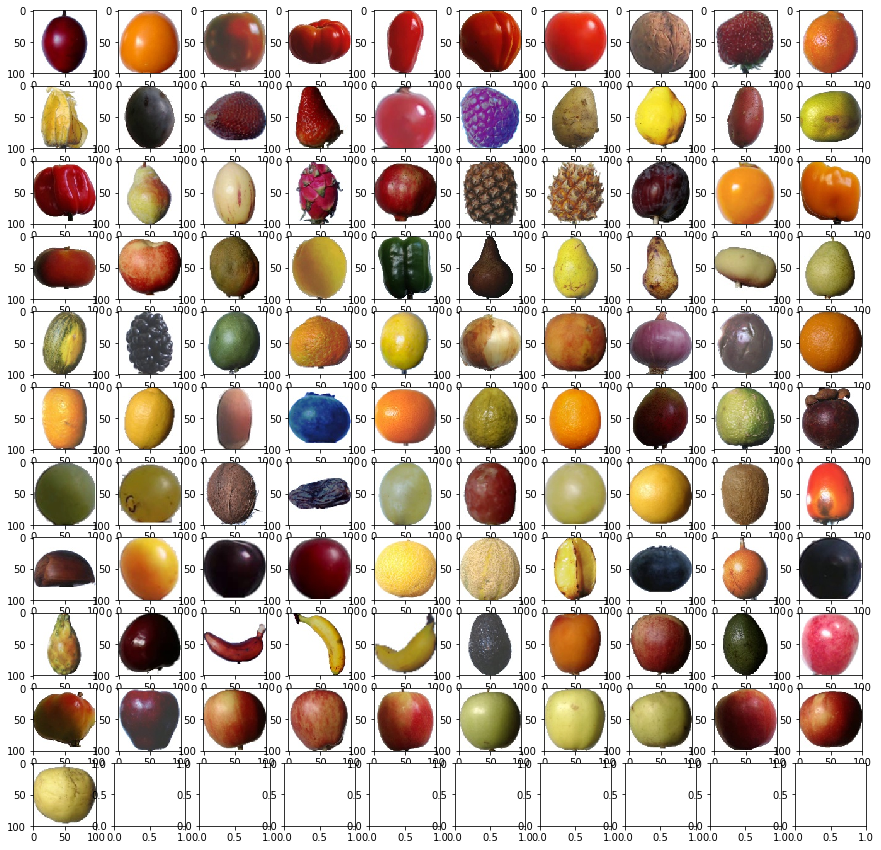

In [33]:
import cv2
categories = list(new_dic.keys())
f, ax = plt.subplots(11,10, figsize=(15, 15)) # 11 hàng, mỗi hàng 10 biểu đồ
i = 0
for category in categories:
  path= os.path.join(train_path, category) # đường dẫn đến các folder là label
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) # để hiện màu trên jupyter notebook
    ax[i//11,i%10].imshow(img_array) # tính toán cho khớp với 11 hàng 10 cột
    i+=1
    break # chỉ vẽ 1 hình đầu tiên rồi break
plt.show()